<a href="https://colab.research.google.com/github/motokikando/bayes_modeling/blob/master/pystan_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#必要なモジュールのインポート
import pandas as pd
import matplotlib.pyplot as plt
import pystan 
%matplotlib inline

In [ ]:
#スタイルの指定
plt.style.use("ggplot")

In [ ]:
file_path = '/content/drive/My Drive/ベイズ統計学/pystan_data/data.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df.head()

,Unnamed: 0,0
0,0,3.896195
1,1,5.865766
2,2,5.860887
3,3,4.660614
4,4,5.263595


(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <a list of 10 Patch objects>)

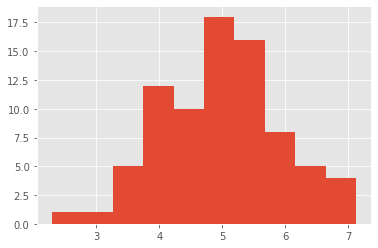

In [ ]:
#ヒストグラムの表示
plt.hist(df[0])

In [ ]:
#stanのモデルの記述
stan_model = """
#データのブロック
data {
  int N; #整数型の変数Nを宣言 N=80
  real Y[N]; #観測したデータを入れる配列
}

#パラメータの指定 正規分布として推定するのはμとσ
parameters { 
  real mu; 
  real <lower=0> sigma; #lower=0はσは下限値を0にして負にならないようにする
}

#統計modelの記述
model {
  for (i in 1:N){
    Y[i] ~ normal(mu, sigma); #Y[i]のそれぞれの値~は〇〇の確率分布に従うという意味
  }

  #事前分布は省略できる→無情報事前分布となる
}

"""

In [ ]:
#コンパイル
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8bcefe884e893c135ad3cadb25f237f4 NOW.


In [ ]:
#渡すデータを辞書型で定義 N, Y[N]
stan_data = {"N": df.shape[0], "Y":df[0]}

In [ ]:
#ハミルトニアンモンテカルロでのMCMCサンプリング MCSの回数は2000, chains3~4 
fit = sm.sampling(data=stan_data, iter=2000, chains = 3, warmup = 500, seed=123)

In [ ]:
fit

Inference for Stan model: anon_model_8bcefe884e893c135ad3cadb25f237f4.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      4.98  1.8e-3   0.11   4.76   4.91   4.98   5.05   5.18   3665    1.0
sigma   0.97  1.4e-3   0.08   0.83   0.92   0.97   1.02   1.14   3325    1.0
lp__  -37.06    0.02   1.02 -39.73 -37.46 -36.74 -36.34 -36.09   2204    1.0

Samples were drawn using NUTS at Sun Jan 16 05:59:46 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

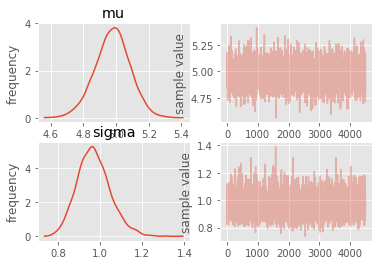

In [ ]:
fig = fit.plot()